In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [2]:
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [3]:
col_names = ['DATE',
             'BASEL_pleasant_weather',
             'BELGRADE_pleasant_weather',
             'BUDAPEST_pleasant_weather',
             'DEBILT_pleasant_weather',
             'DUSSELDORF_pleasant_weather',
             'HEATHROW_pleasant_weather',
             'KASSEL_pleasant_weather',
             'LJUBLJANA_pleasant_weather',
             'MAASTRICHT_pleasant_weather',
             'MADRID_pleasant_weather',
             'MUNCHENB_pleasant_weather',
             'OSLO_pleasant_weather',
             'SONNBLICK_pleasant_weather',
             'STOCKHOLM_pleasant_weather',
             'VALENTIA_pleasant_weather']

df_labels = pd.read_csv(os.path.join(path, 'pleasant weather.csv'), index_col=False)

In [4]:
scaled = pd.read_csv(os.path.join(path, 'Dataset_scaled_correct.csv'))

In [5]:
df_labels

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
scaled['DATE'] = df_labels['DATE']

In [7]:
scaled = scaled.drop(columns=["id", "MONTH"])

In [8]:
scaled["DATE"] = scaled["DATE"].apply(pd.to_datetime)

In [9]:
scaled

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,1970-01-01 00:00:00.019600101
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,1970-01-01 00:00:00.019600102
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,1970-01-01 00:00:00.019600103
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,1970-01-01 00:00:00.019600104
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,1970-01-01 00:00:00.019600105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221027
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221028
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221029
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221030


In [10]:
label_cols = list(df_labels.columns)
label_cols = [x.split("_")[0] for x in label_cols]
label_cols.remove('DATE')

In [11]:
len(scaled.columns)

169

In [12]:
cols_to_keep = []
for col in label_cols:
    for scaled_col in scaled.columns:
        if col in scaled_col:
            cols_to_keep.append(scaled_col)

In [13]:
for col in cols_to_keep:
    print(col)

BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
HEATHROW_cloud_cover
HEATHROW_humidi

In [14]:
label_cols

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [15]:
len(cols_to_keep)

147

In [16]:
y = df_labels.iloc[:, 1:]
X = scaled[cols_to_keep]

In [17]:
# Assuming X is already defined and structured correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Verify the structure of y_test
print(type(y_test))
print(y_test.shape)


<class 'pandas.core.frame.DataFrame'>
(5738, 15)


In [18]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [19]:
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

In [20]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,-1.417570,-0.027930,-0.619294,-0.750867,1.186458,-0.325270,-0.179228,0.535359,1.359088,1.116341,...,0.169692,0.058712,-0.563290,-0.005290,-0.159420,-0.024706,-0.408784,1.464779,1.584476,1.174547
20472,1.076130,-0.573924,0.555086,-0.215925,-0.821838,-0.265148,-0.179228,-1.065304,-1.655817,-1.458775,...,-0.443701,-0.081896,-0.003958,-1.065618,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
18269,0.660514,-0.846921,0.735760,-1.270525,-1.004410,-0.305229,0.817688,-0.926116,-1.655817,-1.887961,...,-0.443701,1.042971,0.406218,-0.829990,-0.455304,-0.024706,-0.078390,-2.921377,-3.225169,-2.190135
7713,-1.417570,-0.027930,-0.167609,0.410721,-0.585568,-0.445514,-0.179228,-0.253374,-1.601495,-1.550743,...,1.396477,1.183580,-1.029400,-1.112744,1.379179,-0.024706,-1.039536,-1.178932,-0.656381,-1.126091
21958,0.660514,3.111534,-0.619294,-0.689731,-0.821838,1.919289,-0.179228,-0.949314,-0.582946,-0.692371,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
11464,0.660514,-0.983419,-1.070979,1.847422,1.583822,-0.445514,-0.179228,1.277695,1.073894,0.656499,...,-1.057093,0.902363,2.196080,2.315650,-0.490810,-0.024706,2.714940,0.713725,0.300082,0.973241
3984,-1.001953,-0.027930,0.374412,-0.001949,-0.811098,-0.445514,-0.179228,-0.230176,-0.908881,-1.044917,...,0.169692,1.042971,-1.197200,-0.829990,-0.455304,-0.024706,-0.078390,0.052797,0.382065,-0.292110
4752,1.076130,-0.027930,1.639129,-0.001949,-1.251420,-0.445514,-0.179228,-1.065304,-1.941011,-2.102554,...,1.396477,1.886622,1.804548,-1.183432,-0.490810,-0.024706,-1.039536,-0.067372,0.491375,-0.608447
11092,0.660514,-0.027930,0.645423,0.150892,0.670960,0.556521,-0.179228,0.210586,0.720797,0.748467,...,0.783085,0.902363,-1.029400,0.866535,0.420514,-0.024706,-0.018319,0.563514,0.436720,0.656903
21377,-1.417570,-1.119918,-1.341989,-0.093653,-0.005632,-0.445514,-0.179228,2.066427,1.141798,0.549202,...,-0.443701,-0.081896,-0.003958,1.773704,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train_df, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000)

In [38]:
y_pred_train = mlp.predict(X_train_df)
print(accuracy_score(y_pred_train, y_train))
y_pred_test = mlp.predict(X_test_df)
print(accuracy_score(y_pred_test, y_test))

0.7633046711596561
0.6484837922621123


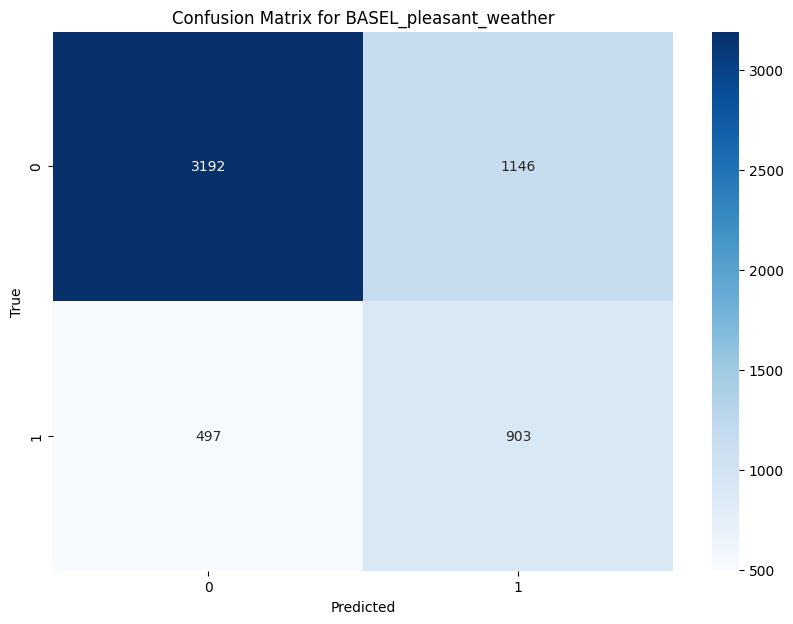

In [39]:
# For simplicity, I'm assuming you want the confusion matrix for the training set predictions
station = 'BASEL_pleasant_weather'
true_labels = y_test[station]
predicted_labels = y_pred_test[:, df_labels.columns.get_loc(station)]

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {station}')
plt.show()

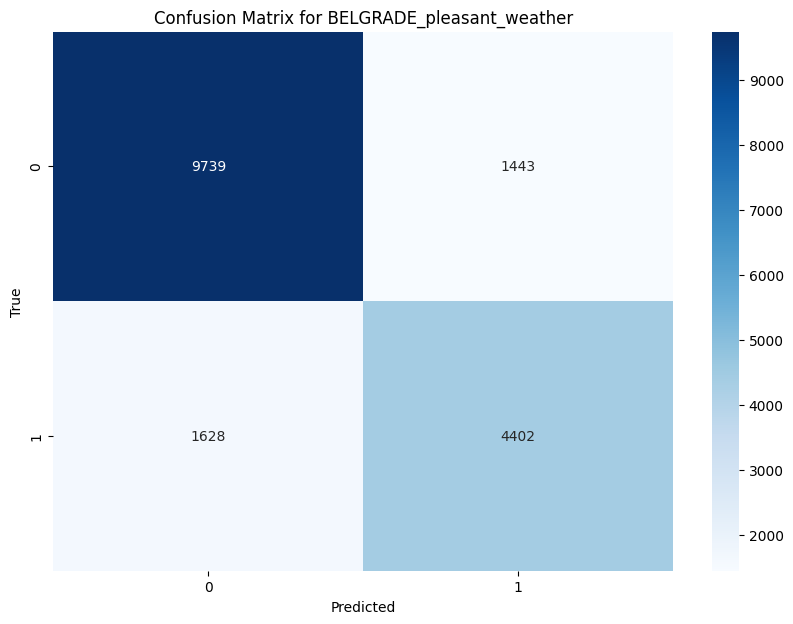

In [40]:
# For simplicity, I'm assuming you want the confusion matrix for the training set predictions
station = 'BELGRADE_pleasant_weather'
true_labels = y_train[station]
predicted_labels = y_pred_train[:, df_labels.columns.get_loc(station)]

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {station}')
plt.show()

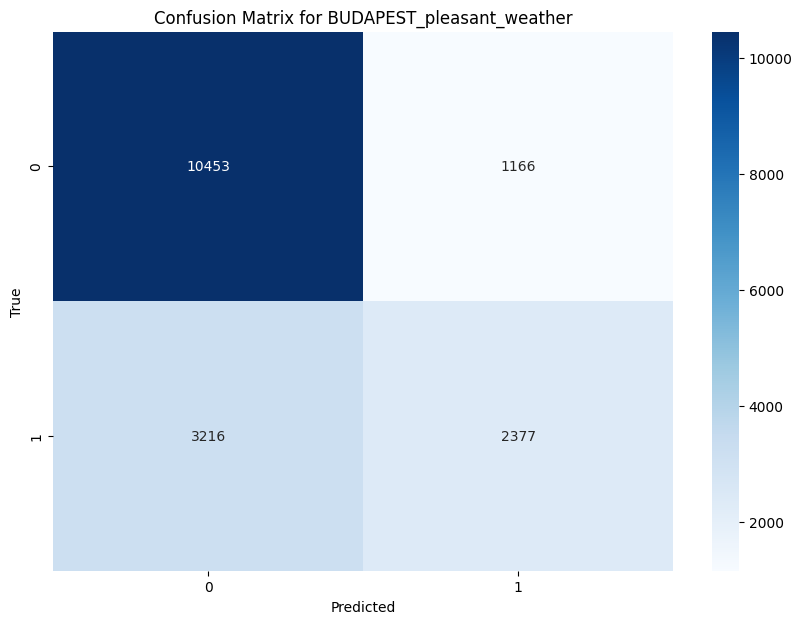

In [41]:
# For simplicity, I'm assuming you want the confusion matrix for the training set predictions
station = 'BUDAPEST_pleasant_weather'
true_labels = y_train[station]
predicted_labels = y_pred_train[:, df_labels.columns.get_loc(station)]

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {station}')
plt.show()

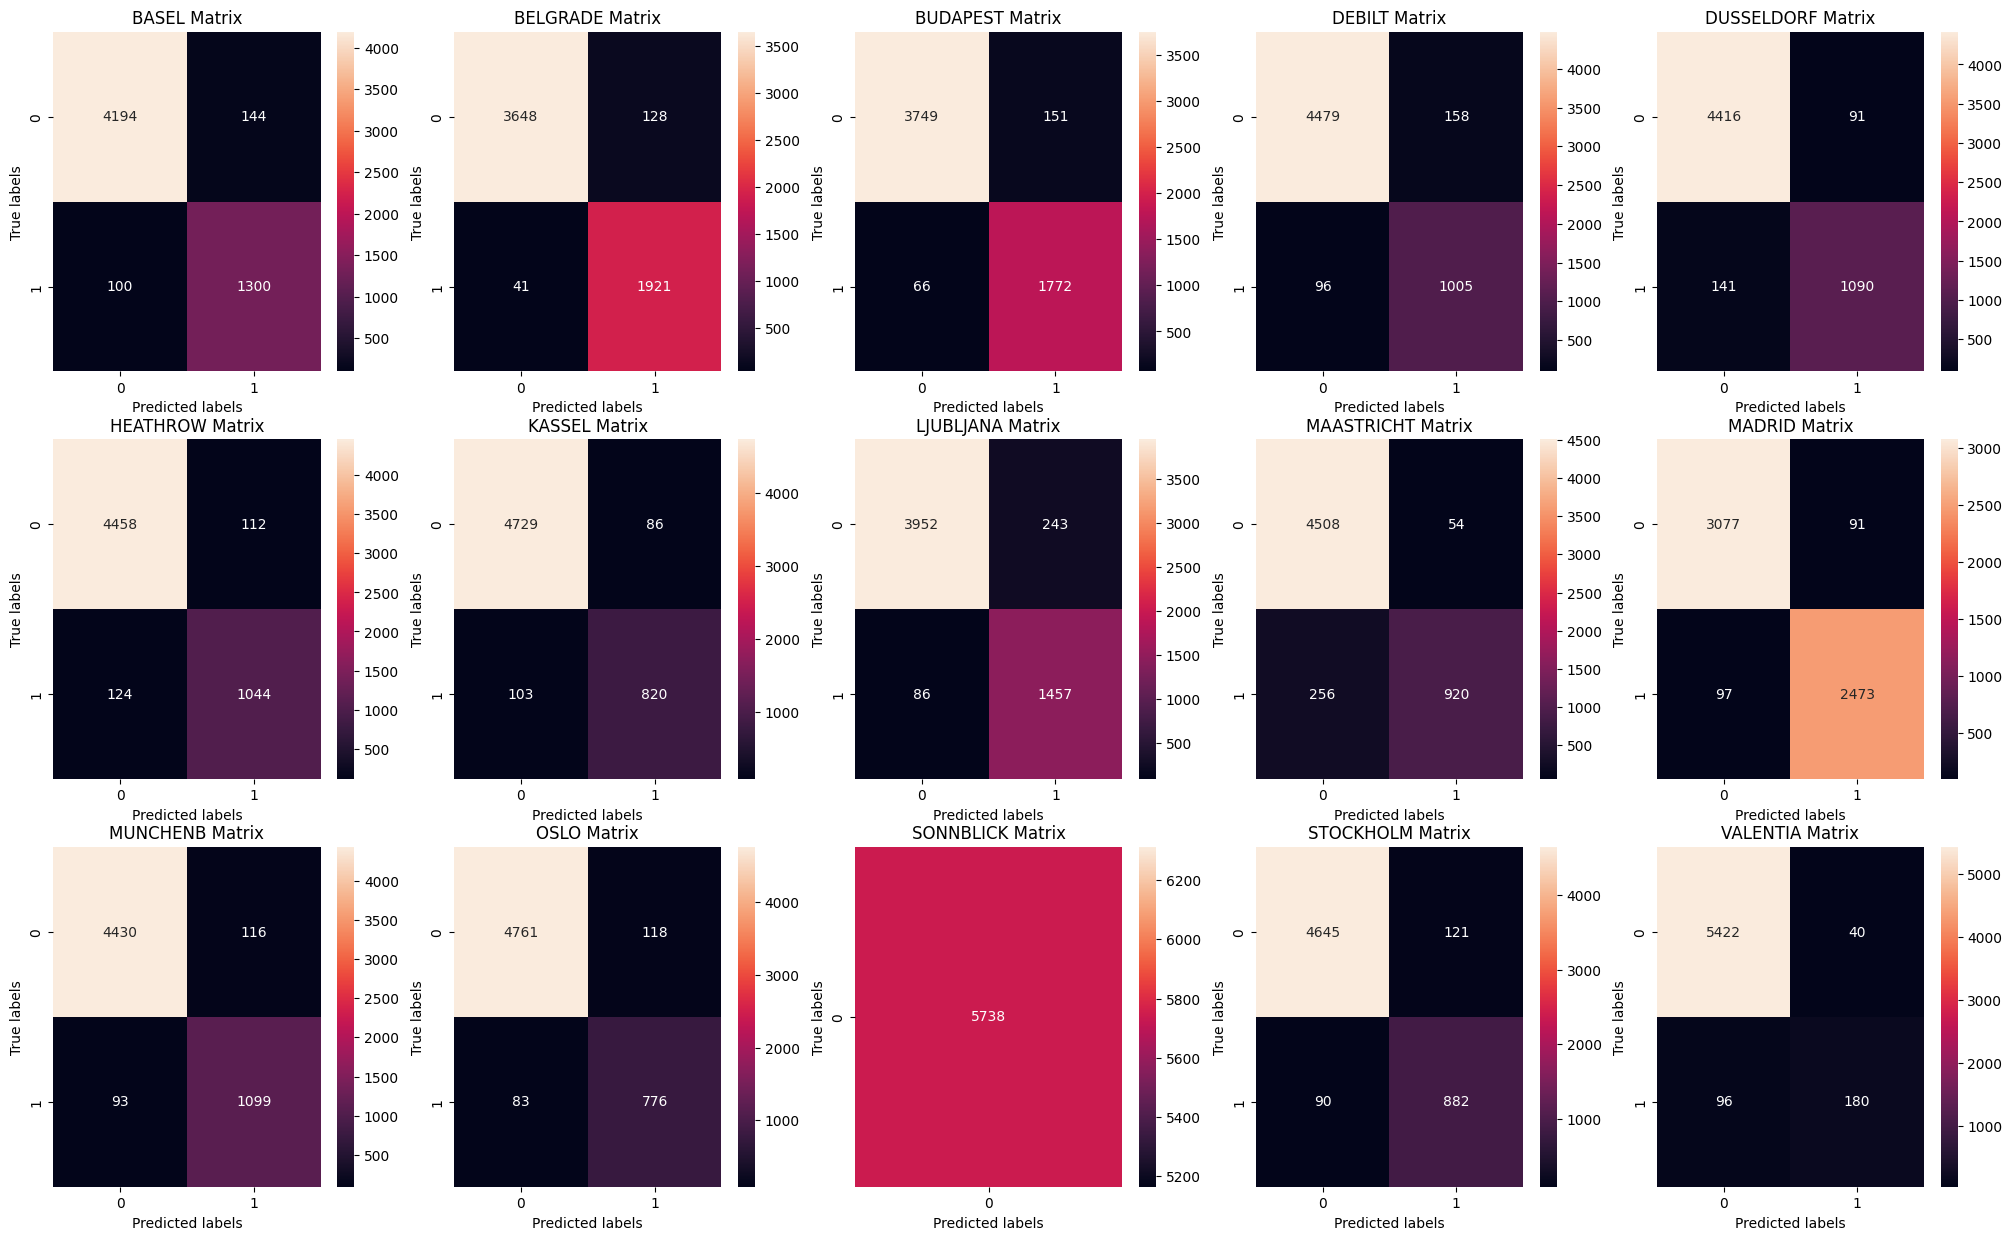

In [42]:
locations = list({x.split("_")[0] for x in df_labels.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
    

In [43]:
cr=classification_report(y_test, y_pred_test)
print(cr)
print()

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1400
           1       0.94      0.98      0.96      1962
           2       0.92      0.96      0.94      1838
           3       0.86      0.91      0.89      1101
           4       0.92      0.89      0.90      1231
           5       0.90      0.89      0.90      1168
           6       0.91      0.89      0.90       923
           7       0.86      0.94      0.90      1543
           8       0.94      0.78      0.86      1176
           9       0.96      0.96      0.96      2570
          10       0.90      0.92      0.91      1192
          11       0.87      0.90      0.89       859
          12       0.00      0.00      0.00         0
          13       0.88      0.91      0.89       972
          14       0.82      0.65      0.73       276

   micro avg       0.91      0.92      0.91     18211
   macro avg       0.84      0.84      0.84     18211
weighted avg       0.91   

C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_cla